# Анализ результатов A/B-теста

## Цель и ход исследования.

**Цели исследования:**
1. Приоритизировать гипотезы.
2. Проанализировать, как изменения, применённые при проведении A/B-теста, повлияли на среднее количество заказов, средний чек и выручку.

**Ход исследования:**
  
  Мы получили данные о пользователях по результатам проведения A/B-теста. О качестве данных ничего не известно. Поэтому перед тем, как приступить к целям исследования, понадобится обзор данных.
  
  Мы проверим данные на наличие пропусков и дубликатов и приведём столбцы к необходимым типам данных.
  
  Таким образом, наше исследование будет состоять из семи этапов:
  - Обзор и предобработка данных.
  - Приоритизация гипотез фреймворками ICE и RICE.
  - Подготовка(агрегация) данных.
  - Построение графиков по кумулятивным метрикам: выручке, среднему чеку, среднему количеству заказов  .
  - Определение статистической значимости различий в среднем количестве заказов по группам по "сырым" и "очищенным" данным
  - Определение статистической значимости различий в среднем чеке по группам по "сырым" и "очищенным" данным .
  - Формулирование выводов и рекомендаций.

## Загрузка библиотек

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Приоритизация гипотез

### Загрузка данных и зкамоство с данными

In [2]:
 hypothesis= pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
pd.options.display.max_colwidth = 250
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вывод:**
 - в нашем распоряжении 9 гипотез, которые необходимо приоритизировать.

### Применяем фреймворк ICE для приоритизации гипотез.

In [4]:
hypothesis['ICE']=round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'],2)

hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**
 - по результатам приоритизации фреймворком ICE в первую очередь необходимо проверить следующие гипотезы:
  1. Запустить акцию, дающую скидку на товар в день рождения.
  2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
  3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
  4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Применяем фреймворк RICE для приоритизации гипотез.

In [5]:
hypothesis['RICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']*hypothesis['Reach']

hypothesis[['Hypothesis','RICE','ICE']].sort_values(by='RICE',ascending=False)\
.style.highlight_max(color='yellowgreen', subset=['RICE','ICE'])

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.330000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.120000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.330000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


**Вывод:**
 - по результатам приоритизации фреймворком RICE в первую очередь необходимо проверить следующие гипотезы:
  1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
  2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
  3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
  4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Вывод по приоритизации гипотез

**После применения фреймворка RICE порядок проверки гипотез изменился. Теперь на первом месте оказалась гипотеза о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, так как её параметр REACH, который определяет количество пользователей, которых затронет изменение равен 10. В то время как у других гипотез этот параметр меньше.**

## Анализ A/B-теста

### Загрузка и обзор данных

In [6]:
orders,visitors = (
    pd.read_csv('/datasets/orders.csv'),  
    pd.read_csv('/datasets/visitors.csv'))

**Напишем функцию для вывода информации по таблице, а также подсчёту пропусков и дубликатов.**

In [7]:
def info(df):
    display(df.head())
    print(('\033[1m' + 'Общая информация о таблице ' + '\033[0m'))
    display(df.info())
    
    print(('\033[1m' + 'Количество пропусков в таблице :' + '\033[0m'))
    display(df.isna().sum())
    
    print('\033[1m' + 'Количество дубликатов в таблице :{}'.format(df.duplicated().sum())  + '\033[0m')

**Обзор таблицы orders.**

In [8]:
info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Общая информация о таблице 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Количество пропусков в таблице :


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество дубликатов в таблице :0


**Вывод:**
 - таблица orders содержит информацию о 1197 заказах и имеет 5 колонок: идентификатор заказа, идентификатор пользователя, дату покупки, выручку заказа и группу A/B-теста.
 - пропуски и дубликаты в таблице не обнаружены
 - столбец с датой имеет некорректный тип данных

**Изменим тип данных колонки с датой на корректный.**

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

**Проверим, нет ли в таблице orders пользователей, попавших в обе группы. Посчитаем для каждого пользователя уникальное количество групп.**

In [10]:
user_on_two_group=orders.groupby('visitorId',as_index=False)['group'].nunique().sort_values(by='group',ascending=False)

user_on_two_group

,visitorId,group
639,2654030115,2
932,3891541246,2
950,3941795274,2
340,1404934699,2
84,351125977,2
...,...,...
357,1476256851,1
358,1476741193,1
359,1484903144,1
360,1485964287,1


**Вывод:**
- в тесте участвуют пользователи, попавшие в обе группы. Чтобы результаты теста не исказились, от таких пользователей необходимо избавиться.

**Создадим список пользователей, попавших в обе группы, а затем из таблицы orders исключим таких пользователей.**

In [11]:
user_on_two_group=user_on_two_group.query('group>1')['visitorId']
orders=orders[np.logical_not(orders['visitorId'].isin(user_on_two_group))]

In [12]:

orders.groupby('visitorId',as_index=False)['group'].nunique().sort_values(by='group',ascending=False).head()

,visitorId,group
0,5114589,1
669,2908466434,1
641,2776274025,1
642,2785040378,1
643,2785527055,1


**Обзор таблицы visitors.**

In [13]:
info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация о таблице 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Количество пропусков в таблице :


date        0
group       0
visitors    0
dtype: int64

Количество дубликатов в таблице :0


**Вывод:**
 - таблица visitors содержит информацию о количестве посетителей сайта по группам за 31 день проведения A/B-теста и имеет 3 колонки: дату посещения, группу A/B-теста и количество посетителей в указанную дату в указанной группе .
 - пропуски и дубликаты в таблице не обнаружены
 - столбец с датой имеет некорректный тип данных

**Изменим тип данных колонки с датой на корректный.**

In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

**Посмотрим, в какие даты проводился тест.**

In [15]:
f'Период проведения теста с {orders.date.dt.date.min()} по {orders.date.dt.date.max()}.'

'Период проведения теста с 2019-08-01 по 2019-08-31.'

### Подготовка данных для анализа

**Построим таблицу с кумулятивными метриками.**

In [16]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']


visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = ['date','orders_cummulative_A','revenue_cummulative_A']

orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)

orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = ['date','orders_cummulative_B','revenue_cummulative_B']


data = (
    orders_A_daily.merge(
        orders_A_cummulative, left_on='date', right_on='date', how='left'
    )
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_daily, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_cummulative_A,revenue_cummulative_A,visitors_per_date_A,visitors_cummulative_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_B,visitors_cummulative_B
0,2019-08-01,23,142779,23,142779,719,719,17,59758,17,59758,713,713
1,2019-08-02,19,91602,42,234381,619,1338,23,162043,40,221801,581,1294
2,2019-08-03,24,112473,66,346854,507,1845,14,67049,54,288850,509,1803
3,2019-08-04,11,41176,77,388030,717,2562,14,96890,68,385740,770,2573
4,2019-08-05,22,86383,99,474413,756,3318,21,89908,89,475648,707,3280


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    31 non-null     datetime64[ns]
 1   orders_per_date_A       31 non-null     int64         
 2   revenue_per_date_A      31 non-null     int64         
 3   orders_cummulative_A    31 non-null     int64         
 4   revenue_cummulative_A   31 non-null     int64         
 5   visitors_per_date_A     31 non-null     int64         
 6   visitors_cummulative_A  31 non-null     int64         
 7   orders_per_date_B       31 non-null     int64         
 8   revenue_per_date_B      31 non-null     int64         
 9   orders_cummulative_B    31 non-null     int64         
 10  revenue_cummulative_B   31 non-null     int64         
 11  visitors_per_date_B     31 non-null     int64         
 12  visitors_cummulative_B  31 non-null     int64       

**Таблица data содержит столбцы:**
- date - дата
- orders_per_date_A - количество заказов в выбранную дату в группе A
- orders_per_date_В - количество заказов в выбранную дату в группе В
- revenue_per_date_A - суммарная выручка в выбранную дату в группе A
- revenue_per_date_В - суммарная выручка в выбранную дату в группе В
- orders_cummulative_A - суммарное число заказов до выбранной даты включительно в группе A
- orders_cummulative_B - суммарное число заказов до выбранной даты включительно в группе B
- revenue_cummulative_A - суммарная выручка до выбранной даты включительно в группе A
- revenue_cummulative_B - суммарная выручка до выбранной даты включительно в группе B
- visitors_per_date_A - количество пользователей в выбранную дату в группе A
- visitors_per_date_B - количество пользователей в выбранную дату в группе B
- visitors_cummulative_A - количество пользователей до выбранной даты включительно в группе A
- visitors_cummulative_B - количество пользователей до выбранной даты включительно в группе B


### График кумулятивной выручки по группам

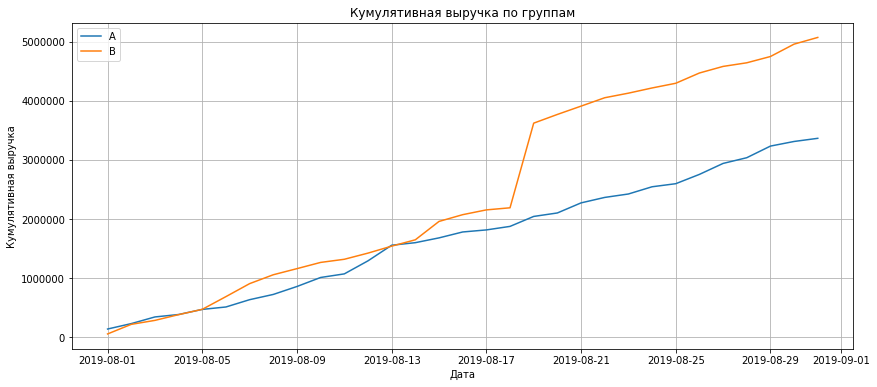

In [18]:
plt.figure(figsize=(14, 6))
plt.ticklabel_format(style='plain')
plt.plot(data['date'], data['revenue_cummulative_A'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenue_cummulative_B'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')
plt.grid()
plt.show()

**Вывод к графику:**
 - кумулятивная выручка стабильно растёт по обеим группам
 - кумулятивная выручка группы B стабильно выше, чем выручка группы A
 - в середине теста произошёл резкий скачок выручки у группы B. Вероятно это связано с аномально дорогим заказом, сделанным , 19 августа.

### График кумулятивного среднего чека по группам

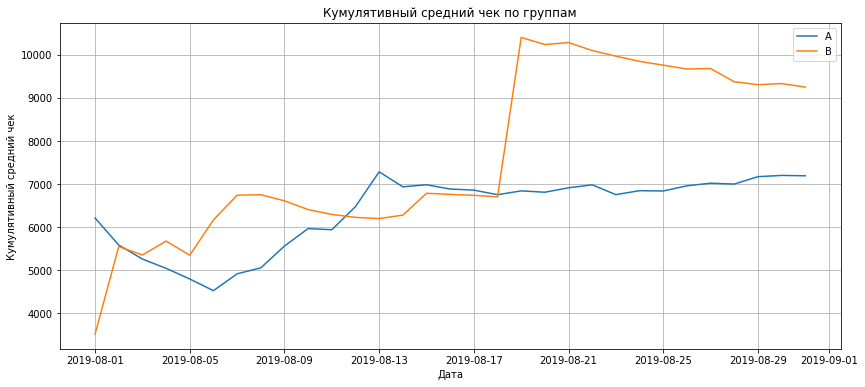

In [19]:
plt.figure(figsize=(14, 6))
plt.ticklabel_format(style='plain')
plt.plot(data['date'], data['revenue_cummulative_A']/data['orders_cummulative_A'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenue_cummulative_B']/data['orders_cummulative_B'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.grid()
plt.show()

**Вывод к графику:**
- в начале теста лидер по среднему чеку постоянно менялся, но за счёт резкого скачка в середине теста, вызванного аномально большим заказом группа В выбилась в лидеры и опережает группу А до конца теста. По группе А также видны скачки в начале теста, вызванные аномально дорогими заказами в эти даты.
- средний чек группы A  практически установился
- средний чек группы B ближе к концу теста равномерно падает

### График относительного изменения кумулятивного среднего чека группы B к группе A

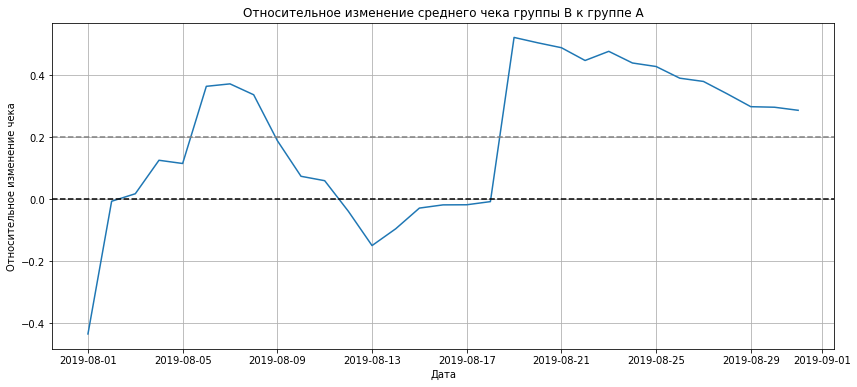

In [20]:
plt.figure(figsize=(14, 6))
plt.ticklabel_format(style='plain')
plt.plot(data['date'], (data['revenue_cummulative_B']/data['orders_cummulative_B'])/
         (data['revenue_cummulative_A']/data['orders_cummulative_A'])-1)




plt.xlabel('Дата')
plt.ylabel('Относительное изменение чека')
plt.title('Относительное изменение среднего чека группы В к группе А')
plt.grid()
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод к графику:**
- график относительного изменения чека резко скачет в нескольких точках. Вероятнее всего, это вызвано аномально дорогими заказами в определённые даты.
- на протяжении большей продолжительности теста группа B уверенно выигрывает у группы А.

### График кумулятивного среднего количества заказов на посетителя по группам.

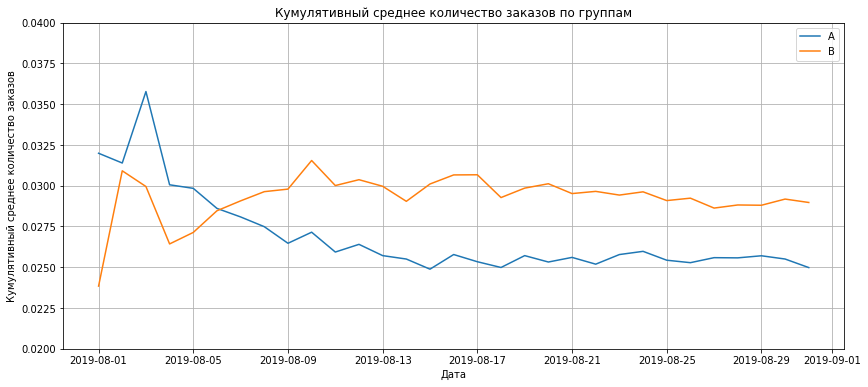

In [21]:
plt.figure(figsize=(14, 6))

plt.plot(data['date'], data['orders_cummulative_A']/data['visitors_cummulative_A'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['orders_cummulative_B']/data['visitors_cummulative_B'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный среднее количество заказов')
plt.title('Кумулятивный среднее количество заказов по группам')
plt.grid()
plt.ylim(0.02, 0.04)
plt.show()

**Вывод по графику**
- в начале теста среднее количество заказов у группы А было больше, чем у группы B, но, начиная со второй недели, группа B уверенно лидирует по этой метрике
- у обеих групп наблюдаются резкие скачки, вызванные аномально большим количеством заказов у некоторых пользователей в определнные даты
- среднее количество заказов практически зафиксировалось у обеих групп. У группы B среднее количество заказов больше примерно на 15-17%, чем у группы А.

###  График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

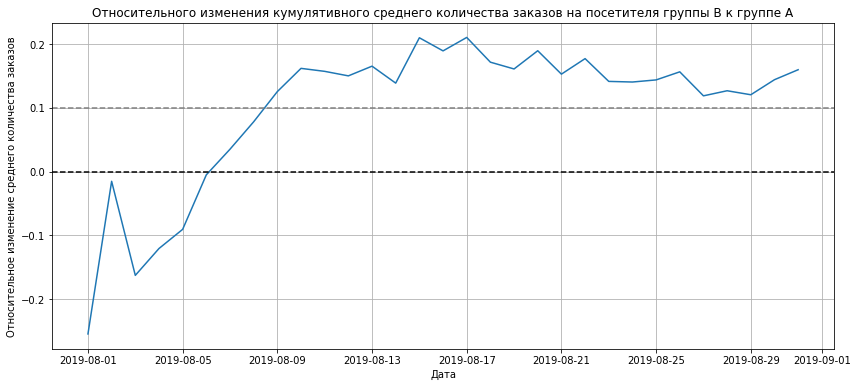

In [22]:
plt.figure(figsize=(14, 6))
plt.ticklabel_format(style='plain')
plt.plot(data['date'], (data['orders_cummulative_B']/data['visitors_cummulative_B'])/
         (data['orders_cummulative_A']/data['visitors_cummulative_A'])-1)




plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количества заказов')
plt.title('Относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

**Вывод по графику:**
- в начале теста группа А лидировала по среднему количеству заказов на пользователя, но потом группа B вырвалась вперёд и стабильно продолжает лидировать 
- относительное изменение среднего количества заказов практически стабилизировалось

### Ищем выбросы по количеству заказов на пользователя и определяем границу аномальных пользователей

**Сгруппирум таблицу orders по пользователям и посчитаем для каждого количество заказов.**

In [23]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(20)) 

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
118   522292794       2
628  2733145037       2
634  2744017357       2
407  1772171838       2
548  2397843657       2
529  2306096143       2
940  4134830387       2
94    406208401       2
176   759473111       2
476  2096506107       2


**Вывод:**
- в тесте участвуют пользователи, сделавшие 2 и 3 заказа.

**Постороим точечный график количества заказов по пользователям.**

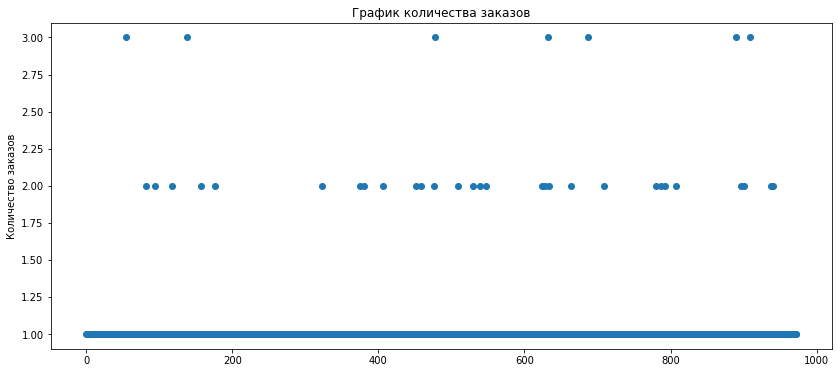

In [24]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(14, 6))

plt.scatter(x_values, orders_by_users['orders'])

plt.ylabel('Количество заказов')
plt.title('График количества заказов')
plt.show()

**Вывод к графику:**
- подавляющее большинство пользователей сделало 1 заказ
- есть пользователи, сделавшие 2-3 заказа.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.**

In [25]:
print(np.percentile(orders_by_users['orders'], [95, 97, 99]))

[1. 2. 2.]


**Вывод:**
- пользователей, сделавших более 2 заказов, будем считать аномальными. Доля таких пользователей менее 1 %.

### Ищем выбросы по стоимости заказов

**Постороим точечный график стоимостей заказов.**

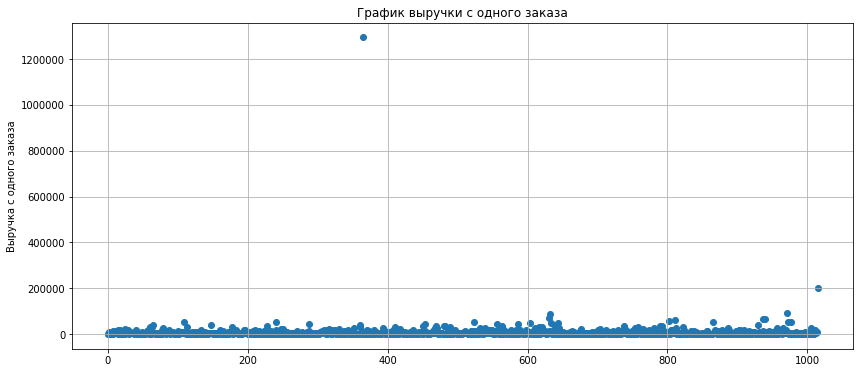

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(14, 6))
plt.ticklabel_format(style='plain')
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.ylabel('Выручка с одного заказа')
plt.title('График выручки с одного заказа')
plt.show()

**Вывод к графику:**
- в тесте участвуют пользователи с аномально дорогими заказами
- по графику видно, что большинство пользователи делали заказы до 60000-70000, но точно определить границы невозможно

**Посчитаем 95-й и 99-й перцентили стоимости заказов.**

In [27]:
print(np.percentile(orders['revenue'], [95,97, 99]))

[26785. 34792. 53904.]


**Вывод:**
- пользователей, сделавших заказ, стоимостью выше 35000 руб будем считать аномальными. Доля таких пользователей около 3 %.

### Cчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Создаём списки по группам с количеством заказов для пользователей в которые войдут:**
- список с количеством заказов, пользователей сделавших хотя бы один заказ для каждой группы
- нули для пользователей, не сделавших ни одного заказа. Количество нулей посчитаем, отняв от общего количества пользователей количество покупателей.

In [28]:
orders_by_users_A = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

orders_by_users_A.columns = ['userId', 'orders']

orders_by_users_B = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

orders_by_users_B.columns = ['userId', 'orders']


sampleA = pd.concat([orders_by_users_A['orders'],
     pd.Series(0,index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
    name='orders')],axis=0)


sampleB = pd.concat([orders_by_users_B['orders'],
    pd.Series(0,index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
    name='orders')],axis=0)



**Сфорумулируем гипотезы:**

Нулевая гипотеза: статистически значимых различий в среднем количестве заказов по сырым данным между группами А и В нет.

Альтернативная гипотеза: есть статистически значимые различия в среднем количестве заказов по сырым данным между группами А и В

Проверим статистически значимые различия методом stats.mannwhitneyu и посчитаем относительный прирост среднего числа заказов группы B по сырым данным.

In [29]:
alpha=0.05
result=round(stats.mannwhitneyu(sampleA, sampleB)[1],3)
print(f'p-value: {result}')
if result < alpha:
    print('ЕСТЬ статистически значимые различия в среднем количестве заказов по сырым данным между группами А и В')
else:
    print(' НЕТ статистически значимых различий в среднем количестве заказов по сырым данным между группами А и В')

print(f'Относительный прирост среднего числа заказов группы B по сырым данным: {round((sampleB.mean() / sampleA.mean() - 1)*100,3)} %')


p-value: 0.011
ЕСТЬ статистически значимые различия в среднем количестве заказов по сырым данным между группами А и В
Относительный прирост среднего числа заказов группы B по сырым данным: 15.98 %


**Вывод:**
- по сырым данным имеются статистически значимые различия по количеству заказов в пользу группы В
- среднее число заказов у группы В по сырым данным больше почти на 16% чем у группы А.

### Cчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сфорумулируем гипотезы:**

Нулевая гипотеза: статистически значимых различий в среднем чеке заказа по сырым данным между группами А и В нет.

Альтернативная гипотеза: есть статистически значимые различия в среднем чеке заказа по сырым данным между группами А и В

Проверим статистически значимые различия методом stats.mannwhitneyu и посчитаем относительный прирост среднего чека группы B по сырым данным.

In [30]:
alpha=0.05

result=round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1],3)
print(f'p-value: {result}')
if result < alpha:
    print('ЕСТЬ статистически значимые различия в среднем чеке заказа по сырым данным между группами А и В')
else:
    print('НЕТ статистически значимых различий в среднем чеке заказа по сырым данным между группами А и В')
             
print('Относительный прирост среднего чека группы B по сырым данным: {0:.3f} %'\
      .format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100)) 

p-value: 0.829
НЕТ статистически значимых различий в среднем чеке заказа по сырым данным между группами А и В
Относительный прирост среднего чека группы B по сырым данным: 28.660 %


**Вывод:**
- не смотря на то, что по сырым данным относительный прирост среднего чека группы B к группе А составляет более 28 %, он не является статистически значимым.

### Cчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Для начала посчитаем сколько у нас аномальных пользователей и какую долю они занимают от всех покупателей.**

In [31]:
users_with_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 2]['userId'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['userId']],axis=0)

users_with_expensive_orders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
.drop_duplicates().sort_values())

display(f'Количество аномальных пользователей: {abnormalUsers.shape[0]}')
display(f'Доля аномальных пользователей от всех покупателей:{round(abnormalUsers.shape[0]/orders.visitorId.nunique()*100,2)} %' )

'Количество аномальных пользователей: 37'

'Доля аномальных пользователей от всех покупателей:3.8 %'

**Вывод:**
- доля аномальных пользователей составляет 3,8 % от всех покупателей.

**Сфорумулируем гипотезы:**

Нулевая гипотеза: статистически значимых различий в среднем количестве заказов по очищенным данным между группами А и В нет.

Альтернативная гипотеза: есть статистически значимые различия в среднем количестве заказов по очищенным данным между группами А и В

Проверим статистически значимые различия методом stats.mannwhitneyu и посчитаем относительный прирост среднего числа заказов группы B по очищенным данным.

In [32]:
sampleAFiltered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),name='orders')],axis=0,)

sampleBFiltered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),name='orders')],axis=0,)



In [33]:
alpha=0.05
result=round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],3)
print(f'p-value: {result}')
if result < alpha:
    print('ЕСТЬ статистически значимые различия в среднем количестве заказов по очищенным данным между группами А и В')
else:
    print(' НЕТ статистически значимых различий в среднем количестве заказов по очищенным данным между группами А и В')


print(f'относительный прирост среднего числа заказов группы B по очищеным данным: {round((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100,3)} %') 

p-value: 0.007
ЕСТЬ статистически значимые различия в среднем количестве заказов по очищенным данным между группами А и В
относительный прирост среднего числа заказов группы B по очищеным данным: 19.427 %


**Вывод:**
- исключив аномальных пользователей, мы получили ещё бОльшую статическую значимость различия по количеству заказов в пользу группы В
- прирост среднего количества заказов на пользователя группы B к группе A увеличился до  20,5 %

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Сфорумулируем гипотезы:**

Нулевая гипотеза: статистически значимых различий в среднем чеке заказа по очищенным данным между группами А и В нет.

Альтернативная гипотеза: есть статистически значимые различия в среднем чеке заказа по очищенным данным между группами А и В

Проверим статистически значимые различия методом stats.mannwhitneyu и посчитаем относительный прирост среднего чека группы B по очищенным данным.

In [34]:
alpha=0.05

result=round(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
orders[np.logical_and(orders['group'] == 'B',
                      np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1],3)

print(f'p-value: {result}')
if result < alpha:
    print('ЕСТЬ статистически значимые различия в среднем чеке заказа по очищенным данным между группами А и В')
else:
    print('НЕТ статистически значимых различий в среднем чеке заказа по очищенным данным между группами А и В')
             
print("Относительный прирост среднего чека группы B по очищенным данным: {0:.3f} %".format((orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        - 1)*100))

p-value: 0.869
НЕТ статистически значимых различий в среднем чеке заказа по очищенным данным между группами А и В
Относительный прирост среднего чека группы B по очищенным данным: 0.332 %


**Вывод:**
- без аномальных пользователей разница в среднем чеке составила всего 5,5% в пользу группы B, и тем более не является статистически значимой.

## Выводы и рекомендации по анализу A/B-теста

### Выводы по анализу A/B-теста

**Мы проанализировали данные, содержащие информацию о заказах, выручке, количеству посетителей и группе теста по A/B-тесту, проводившемуся с 01 августа 2019 года по 31 августа 2019 года:**

**На этапе предобратоки мы:**
- исключили из анализа пользователей, попавших в обе группы
- проверили данные на наличие дубликатов и пропусков
- привели столбцы к корректному типу данных

**Анализ A/B-теста показал:**
1. Куммулятивная выручка растёт по обеим группам.
2. Есть статистистически значимое различие по количеству заказов как по сырым, так и по отфильтрованным данным в пользу группы B. Прирост среднего количества заказов на пользователя группы B к группе A по очищенным данным составил 20,5 %.
3. График относительного изменения среднего количества заказов показал,что результаты практически стабилизировалось.
4. По сырым данным относительный прирост среднего чека группы B к группе А составил более 28%, но при этом тест показал, что этот прирост не имеет статистической значимости.
5. По данным после фильтрации от аномалий также нет статистически значимого различия по среднему чеку между группами.

### Рекомендации по проведению теста

**Тест следует остановить и признать победу группы B. Благодаря внесённым изменениям, статистически значимо увеличилось количество заказов, а следовательно увеличилась и выручка.**